In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'../data/kmeans_dataset.csv')

In [5]:
df.describe()

,Feature1,Feature2
count,300.000000,300.000000
mean,-0.010784,1.650412
std,4.176785,4.778221
min,-7.471645,-6.952088
25%,-4.395107,-4.352977
50%,0.105597,4.200414
75%,4.237047,5.270038
max,6.886186,7.720169


```
Pseudo Code

1. Initiate- Randomly select K data points from a given data set as initial centroids 
2. Assign- Assign each data point to the nearest Centroid. This will help form clusters- Using Euclidean Distance
3. Update- update centroids by calculating mean of all the points in each cluster(vectors) 
4. k_means- convergence until labels dont change or maximum number of iterations is reached

```

In [20]:
class KMeans:
    def __init__(self, k: int, max_iters: int = 100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.labels = None

    def initialize_centroids(self, X: np.ndarray) -> np.ndarray:
        """Randomly initialize k centroids from the given data points."""
        return X[np.random.choice(X.shape[0], self.k, replace=False)]

    def assign_clusters(self, X: np.ndarray) -> np.ndarray:
        """Assign each data point to the closest centroid."""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def update_centroids(self, X: np.ndarray, labels: np.ndarray) -> np.ndarray:
        """Update the centroids based on the current assignment of data points to clusters."""
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centroids[i] = np.mean(X[labels == i], axis=0)
        return new_centroids

    def fit(self, X: np.ndarray):
        """Run the K-means algorithm on the given data points."""
        self.centroids = self.initialize_centroids(X)
        for _ in range(self.max_iters):
            self.labels = self.assign_clusters(X)
            new_centroids = self.update_centroids(X, self.labels)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Predict the closest cluster each sample in X belongs to."""
        return self.assign_clusters(X)

    def plot_clusters(self, X: np.ndarray):
        """Plot the data points and the centroids."""
        plt.scatter(X[:, 0], X[:, 1], c=self.labels, s=50, cmap='viridis')
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], c='red', s=200, marker='x')
        plt.title("K-means Clustering")
        plt.xlabel("Feature 1")
        plt.ylabel("Feature 2")
        plt.show()

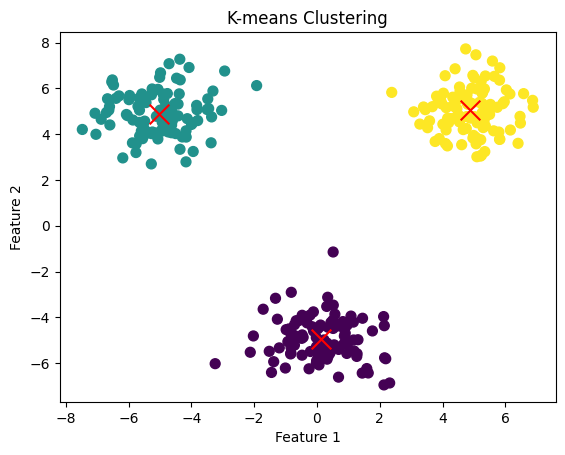

In [21]:
kmeans = KMeans(k=3)
kmeans.fit(df.values)
kmeans.plot_clusters(df.values)